In [1]:
from math import sin, cos
from numpy import array,arange, pi
from pylab import plot, xlabel, show,grid

In [2]:
a = 0.0
b = 10.0 #final time
N = 1000
h = (b-a)/N
target = 1e-10
g = 9.81

In [3]:
def f(r):
    y = r[0]
    vy = r[1]
    fy = vy
    fvy = -g
    return array([fy, fvy],float)

In [4]:
# Runge-Kutta method
def height(v):
    r = array([0.0, v], float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
    return r[0]
    

In [8]:
# Binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2 - h1) > target:
    vp = (v1 + v2)/2
    hp = height(vp)
    if h1*hp > 0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp
v = (v1 + v2)/2
print("height(v1)=", h1)
print("height(v2)=", h2)
print("v=", v, "m/s")

height(v1)= -5.627787125206396e-11
height(v2)= 1.477640232394606e-11
v= 49.04999999999815 m/s


In [6]:
height(0.01)

-490.40000000000384

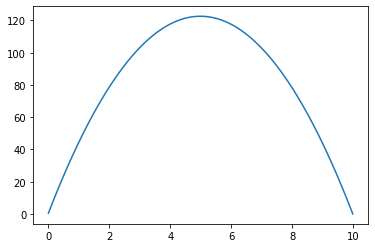

In [15]:
tpoints = arange(a,b,h)
xpoints = []

r = array([0.0, v], float)
for t in arange(a,b,h):
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    xpoints.append(r[0])

plot(tpoints, xpoints)
